In [1]:
#L Colleyn +.+
import numpy as np
import sympy 
import matplotlib
from numpy import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython import display 
from matplotlib.patches import Rectangle

The main source code is in the class 'FissionChain'. The class method 'main' returns the survival fraction $f$, and requires specification of mass M (g) and number of intial fissions $N$. Parameters for the shape ($S=a/b$, default 1, $b=c$),  enrichment ($E=\%U^{235}$, default 1) and fission cross-section ($A$, default $2.5e-24 cm^2$), can be specified. The method 'main' calls on the four other functions defined in the class: 'mass_shape' (returns shape dimensions), 'fission_loc' (returns initial fission location), 'neutron_travel' (returns neutron destination) and 'check_inside' (checks if neutron is inside shape). Each of these methods can be called individually for specific interpretations.

In [2]:
class FissionChain: 
    def __init__(self,M,N,S=1,E=1,A=2.5e-24):
        self.M=M #mass (g)
        self.N=N #number of initial fissions
        self.S=S #shape=a/b, b=c
        self.E=E #enrichment/abundance of U235
        self.A=A #neutron fission cross-section (cm^2/atom)

    def mass_shape(self): #get side lengths (cm), from shape/mass (g), S=a/b, b=c
        rho=19 #g/cm3
        b=(self.M/(rho*self.S))**(1/3) 
        c=b
        a=self.S*b        
        return a,b,c #a=b=c if S=1

    def fission_loc(self,a,b,c): #random fission location 
        #generate starting point
        x0=random.uniform(-a/2,a/2) #x-start
        y0=random.uniform(-b/2,b/2) #y-start
        z0=random.uniform(-c/2,c/2) #z-start
        return x0,y0,z0

    def neutron_travel(self,x0,y0,z0): #random neutron travel
        nA=6.023e23 #mol
        rho=19 #g/cm^3
        W=235.043 #g/mol
        nd=rho*nA/W #number density 
        mfp=1/(nd*self.A) #mean free path

        #generate travel
        d=random.normal(mfp,0.01) #distance
        phi=random.uniform(0,2*np.pi) #azimuth
        theta=random.uniform(0,np.pi) #inclination
        x1=x0+d*np.sin(theta)*np.cos(phi) #x-destination
        y1=y0+d*np.sin(theta)*np.sin(phi) #y-destination
        z1=z0+d*np.cos(theta) #z-destination
        return x1,y1,z1 

    def check_inside(self,a,b,c,x1,y1,z1): #check if neutron inside
        if np.abs(x1)<=(a/2) and np.abs(y1)<=(b/2) and np.abs(z1)<=(c/2): 
            return True 
        else: 
            return False 

    def main(self): #find survival fraction
        a,b,c=self.mass_shape() #get dimensions
        Nin=0 #induced fissions  
        for _ in range(self.N): 
            x0,y0,z0=self.fission_loc(a,b,c) #generate fission location
            for _ in range(round(random.normal(2.45,0.07))): #two or three neutrons produced, round value generated from the normal distribution         
                x1,y1,z1=self.neutron_travel(x0,y0,z0) #generate neutron travel        
                if self.check_inside(a,b,c,x1,y1,z1) and random.random()<=self.E: #check inside, E-enrichment default 1
                    Nin+=1    
        return Nin/self.N #f
        
chain=FissionChain(110000,1000)
f=chain.main()
print("f =", f)

f = 1.01


The two following cells show the Gaussian (Normal) distributions from which we select the number of fissions emitted in a single fission and the neutron travel distance, respectively. A calculation for the mean free path of fast neutrons is also included.

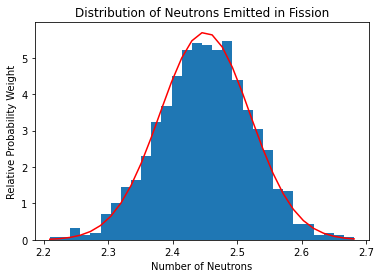

In [10]:
#plotting distribution of neutrons emitted in a single fission
mu,sigma=2.45,0.07 #2.45 average neutrons emitted from fission
s=random.normal(mu,sigma,1000) #approximate with a gaussian
count,x,patches=plt.hist(s,30,density=True)
plt.plot(x,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)),color='r') #plot distribution function
plt.title('Distribution of Neutrons Emitted in Fission')
plt.xlabel('Number of Neutrons')
plt.ylabel('Relative Probability Weight')
#plt.savefig('NEm_distr.png')
plt.show()

mfp = 8.215629560369461 cm


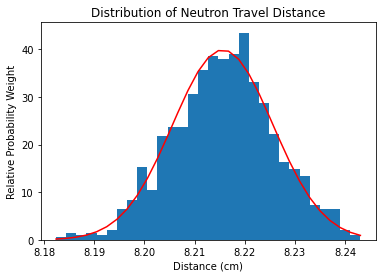

In [9]:
#plotting distribution of single neutron travel distance after fission
A=2.5e-24 #cm^2/atom
#A=5.843e-22 #cm^2/atom -> slow thermal neutrons
nA=6.023e23 #mol^-1 - Avogadro's Number
rho=19 #g/cm^3
W=235.043 #g/mol
nd=rho*nA/W #number density 
mfp = 1/(nd*A) #mean free path
print('mfp =', mfp, 'cm')
mu,sigma=mfp,0.01 
s=random.normal(mu,sigma,1000) #approximate with a gaussian
count,x,patches=plt.hist(s,30,density=True)
plt.plot(x,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)),color='r') #plot distribution function
plt.title('Distribution of Neutron Travel Distance')
plt.xlabel('Distance (cm)')
plt.ylabel('Relative Probability Weight')
#plt.savefig('NTr_distr.png')
plt.show()

The following cell shows a snapshot at the end of our simulation for a pure cube of $U^{235}$ of the start and end positions of neutrons. It is rendered in two dimensions, and thus not all of the endpoints appearing within the confines of the box are actually inside. The image doesn't differentiate between induced and lost neutrons, but simply shows the neutron endpoints in two dimensions. 

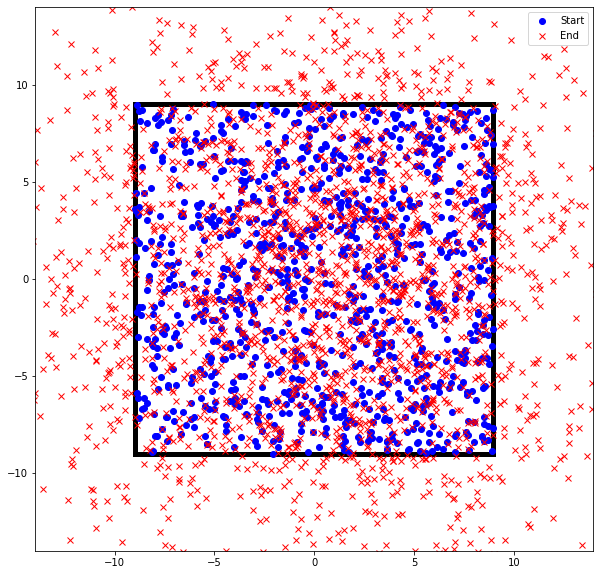

In [32]:
#show box
a,b,c=chain.mass_shape() #get dimensions
fig,ax=plt.subplots(figsize=(10,10))
ax.add_patch(Rectangle((-a/2,-b/2),a,b,edgecolor='Black',fill=False,lw=5)) #plot shape
startsx=[]
startsy=[]
endsx=[]
endsy=[]
for _ in range(chain.N): 
            x0,y0,z0=chain.fission_loc(a,b,c) #generate fission location
            startsx.append(x0)
            startsy.append(y0)
            for _ in range(round(random.normal(2.45,0.07))): #two or three neutrons produced         
                x1,y1,z1=chain.neutron_travel(x0,y0,z0)
                endsx.append(x1)
                endsy.append(y1)
ax.plot(startsx, startsy, 'bo', label='Start')
ax.plot(endsx, endsy, 'rx', label='End')
ax.set_xlim([-(a/2)-5,(a/2)+5])
ax.set_ylim([-(b/2)-5,(b/2)+5]) 
ax.legend()
#plt.savefig('Box')

The following cells display the plots produced to analyze our simulation. In short, we plotted the value of $f$ vs. $M$ and found the mass corresponding to the intersection of $f$ given by the simulation to $f=1$. Specifically, we find the index (relating to the mass) corresponding to the computed $f$ which is closest to $f=1$. We also plotted the result of $f$ from 100 trials with the approximate critical mass, in order to confirm our result. We can alter the number of trials by changing the value of 'ntrials'. We'll also note that the first of these cells simply shows the behavior of $f$ for three different masses $M$ of the pure cube case, over 100 trials. 

In [38]:
'''
WARNING:
The following cells may take a long time to run. To get outputs faster, make N smaller
'''

'\nWARNING:\nThe following cells may take a long time to run. To get outputs faster, make N smaller\n'

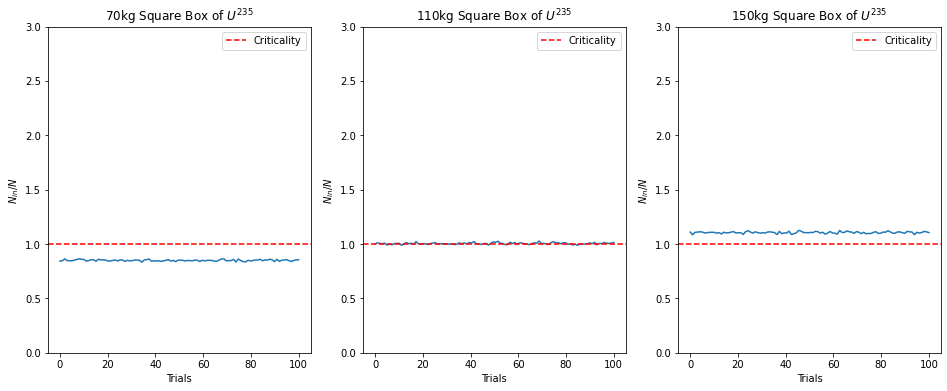

In [33]:
#plotting f vs. ntrials for different masses
chain=FissionChain(70000,10000) #70kg
chain1=FissionChain(110000,10000) #110kg
chain2=FissionChain(150000,10000) #150kg
survival_fracs=[]
survival_fracs1=[]
survival_fracs2=[]
ntrials=100
for _ in range(ntrials):
    survival_fracs.append(chain.main())
    survival_fracs1.append(chain1.main())
    survival_fracs2.append(chain2.main())
    
fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,6))
ax.plot(np.linspace(0,ntrials,ntrials),survival_fracs)
ax.axhline(1.0,c='r',linestyle='--',label='Criticality')
ax.set_ylim(0,3)
ax.set_title(r'70kg Square Box of $U^{235}$')
ax.set_xlabel('Trials')
ax.set_ylabel(r'$N_{in}/N$') 
ax1.plot(np.linspace(0,ntrials,ntrials),survival_fracs1)
ax1.axhline(1.0,c='r',linestyle='--',label='Criticality')
ax1.set_ylim(0,3)
ax1.set_title(r'110kg Square Box of $U^{235}$')
ax1.set_xlabel('Trials')
ax1.set_ylabel(r'$N_{in}/N$')
ax2.plot(np.linspace(0,ntrials,ntrials),survival_fracs2)
ax2.axhline(1.0,c='r',linestyle='--',label='Criticality')
ax2.set_ylim(0,3)
ax2.set_title(r'150kg Square Box of $U^{235}$')
ax2.set_xlabel('Trials')
ax2.set_ylabel(r'$N_{in}/N$')

ax.legend()
ax1.legend()
ax2.legend()
#plt.savefig('Base1.png')

M_c = 113.13131313131314  kg


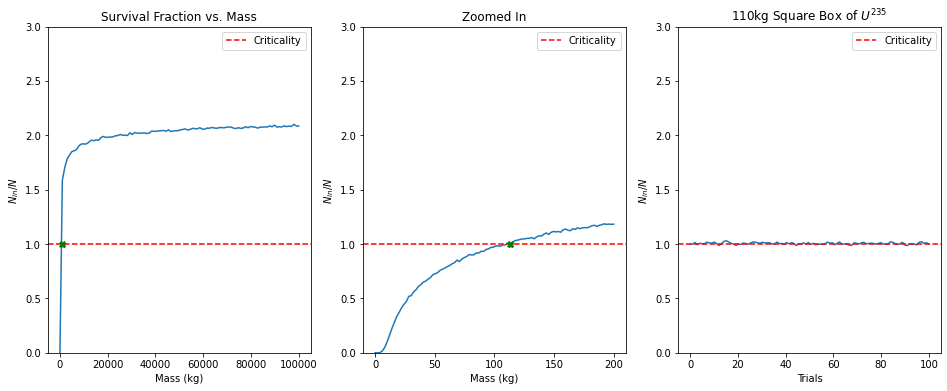

In [15]:
#plotting f vs. different masses
survival_fracs=[]
survival_fracs1=[]
survival_fracs2=[]
masses=np.linspace(0,100000000,100)
masses1=np.linspace(0,200000,100)
criticality=np.linspace(1,1,100) #f=1.0
for M in masses:
    chain=FissionChain(M,10000)
    survival_fracs.append(chain.main()) 
for M in masses1:
    chain1=FissionChain(M,10000)
    survival_fracs1.append(chain1.main())
chain=FissionChain(110000,10000)
ntrials=100
for _ in range(ntrials):
    survival_fracs2.append(chain.main())

fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,6))
ax.plot(masses/1000,survival_fracs)
ax.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax.set_ylim(0,3)
ax.set_title('Survival Fraction vs. Mass')
ax.set_xlabel(r'Mass (kg)')
ax.set_ylabel(r'$N_{in}/N$')
intersection=masses[np.argmin(np.abs(np.array(survival_fracs)-np.mean(criticality)))] #find index corresponding to smallest difference between survival_fracs and f=1
ax.plot(intersection/1000,np.mean(criticality),'gX')
ax1.plot(masses1/1000,survival_fracs1)
ax1.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax1.set_ylim(0,3)
ax1.set_title('Zoomed In')
ax1.set_xlabel(r'Mass (kg)')
ax1.set_ylabel(r'$N_{in}/N$')
intersection1=masses1[np.argmin(np.abs(np.array(survival_fracs1)-np.mean(criticality)))] #find index corresponding to smallest difference between survival_fracs and f=1
ax1.plot(intersection1/1000,np.mean(criticality),'gX')
ax2.plot(np.linspace(0,ntrials,ntrials),survival_fracs2)
ax2.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax2.set_ylim(0,3)
ax2.set_title(r'110kg Square Box of $U^{235}$')
ax2.set_xlabel('Trials')
ax2.set_ylabel(r'$N_{in}/N$')
ax.legend()
ax1.legend()
ax2.legend()
plt.savefig('Base.png')
print(r'M_c =',masses1[np.argmin(np.abs(np.array(survival_fracs1)-np.mean(criticality)))]/1000, ' kg')

<IPython.core.display.Javascript object>


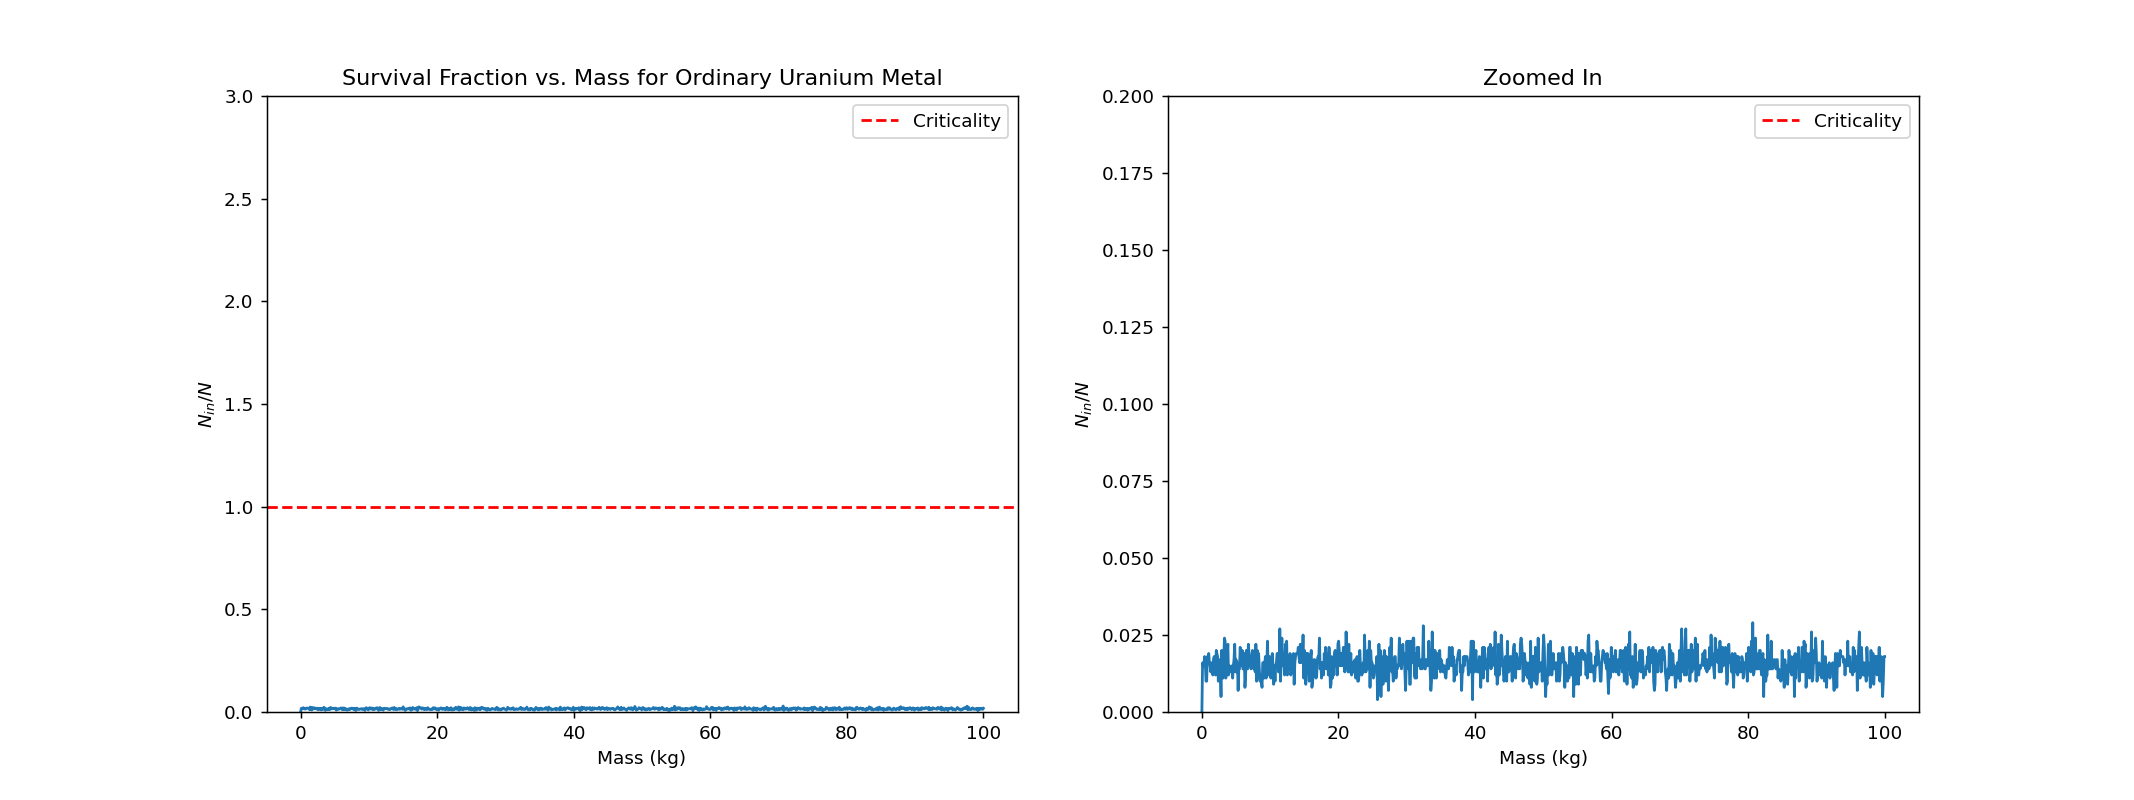

In [42]:
#plotting f vs. different masses for E=0.007, and slow thermal neutrons: A=5.843e-22cm^2 i.e a normal Uranium metal
survival_fracs=[]
survival_fracs1=[]
masses=np.linspace(0,100000,1000)
masses1=np.linspace(0,100000,1000)
for M in masses:
    chain=FissionChain(M,1000,E=0.007,A=5.843e-22) 
    survival_fracs.append(chain.main()) 
for M in masses1:
    chain1=FissionChain(M,1000,E=0.007,A=5.843e-22)
    survival_fracs1.append(chain1.main())
fig,(ax,ax1)=plt.subplots(1,2,figsize=(16,6))
ax.plot(masses/1000,survival_fracs)
ax.axhline(1.0,c='r',linestyle='--',label='Criticality')
ax.set_ylim(0,3)
ax.set_title('Survival Fraction vs. Mass for Ordinary Uranium Metal')
ax.set_xlabel(r'Mass (kg)')
ax.set_ylabel(r'$N_{in}/N$')
ax1.plot(masses1/1000,survival_fracs1)
ax1.axhline(1.0,c='r',linestyle='--',label='Criticality')
ax1.set_ylim(0,0.2)
ax1.set_title('Zoomed In')
ax1.set_xlabel(r'Mass (kg)')
ax1.set_ylabel(r'$N_{in}/N$')
ax.legend()
ax1.legend()
#plt.savefig('Metal_m.png')

M_c = 181.8181818181818  kg


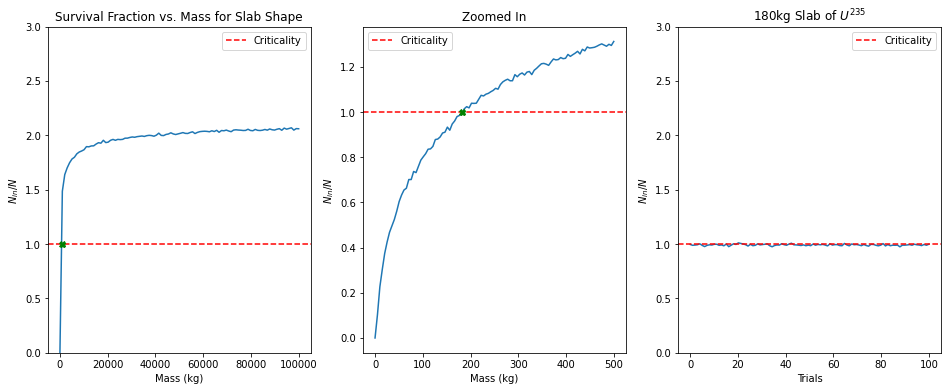

In [19]:
#plotting f vs. different masses for S=0.25:slab-like shape
survival_fracs=[]
survival_fracs1=[]
survival_fracs2=[]
masses=np.linspace(0,100000000,100)
masses1=np.linspace(0,500000,100)
criticality=np.linspace(1,1,100) #f=1.0
for M in masses:
    chain=FissionChain(M,10000,S=0.25)
    survival_fracs.append(chain.main()) 
for M in masses1:
    chain1=FissionChain(M,10000,S=0.25)
    survival_fracs1.append(chain1.main())
chain=FissionChain(180000,10000,S=0.25)
ntrials=100
for _ in range(ntrials):
    survival_fracs2.append(chain.main())
    
fig,(ax,ax1,ax2)=plt.subplots(1,3,figsize=(16,6))
ax.plot(masses/1000,survival_fracs)
ax.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax.set_ylim(0,3)
ax.set_title('Survival Fraction vs. Mass for Slab Shape')
ax.set_xlabel(r'Mass (kg)')
ax.set_ylabel(r'$N_{in}/N$')
intersection=masses[np.argmin(np.abs(np.array(survival_fracs)-np.mean(criticality)))] #find index corresponding to smallest difference between survival_fracs and f=1
ax.plot(intersection/1000,np.mean(criticality),'gX')
ax1.plot(masses1/1000,survival_fracs1)
ax1.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax1.set_title('Zoomed In')
ax1.set_xlabel(r'Mass (kg)')
ax1.set_ylabel(r'$N_{in}/N$')
intersection1=masses1[np.argmin(np.abs(np.array(survival_fracs1)-np.mean(criticality)))] #find index corresponding to smallest difference between survival_fracs and f=1
ax1.plot(intersection1/1000,np.mean(criticality),'gX')
ax2.plot(np.linspace(0,ntrials,ntrials),survival_fracs2)
ax2.axhline(np.mean(criticality),c='r',linestyle='--',label='Criticality')
ax2.set_ylim(0,3)
ax2.set_title(r'180kg Slab of $U^{235}$')
ax2.set_xlabel('Trials')
ax2.set_ylabel(r'$N_{in}/N$')
ax.legend()
ax1.legend()
ax2.legend()
plt.savefig('Slab_m.png')
print(r'M_c =',masses1[np.argmin(np.abs(np.array(survival_fracs1)-np.mean(criticality)))]/1000, ' kg')

The following cells are animated versions of the aforementioned 2D rendering of the simulation. To better visualize the simulation, we now denote the neutrons which induce fissions in green and those that do not in red. This way, we can differentiate between neutrons which only appear to induce fissions because they look to be inside the box, and those that actually do induce fission. We'll note that for most of these, $N=1000$, such that the animation file size is not too large.

<IPython.core.display.Javascript object>


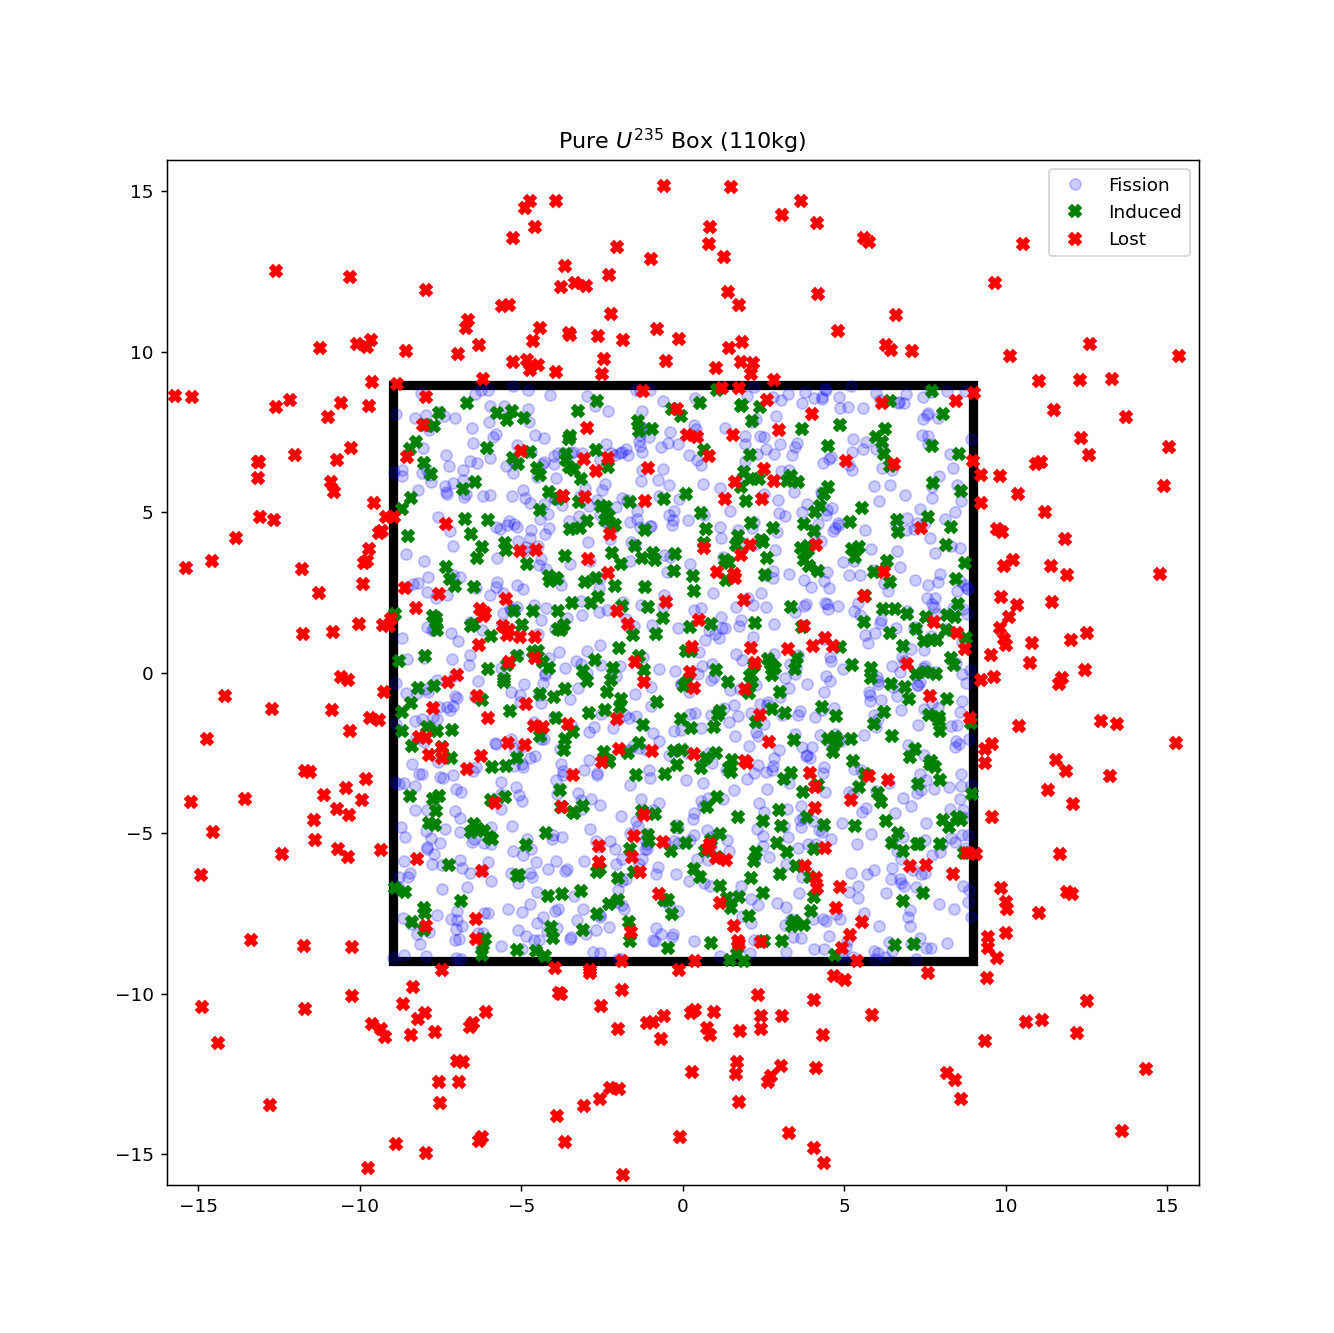

In [29]:
'''
2D animation - running this cell (and all following cells) will cause all other 
mpl plots in this notebook to become 'animations'
To fix, restart kernel and run. 
'''
%matplotlib notebook
chain=FissionChain(110000,1000) #110kg, fast neutrons, pure Uranium-235
a,b,c=chain.mass_shape() 
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim([-(a/2)-7,(a/2)+7])
ax.set_ylim([-(b/2)-7,(b/2)+7])
ax.add_patch(Rectangle((-a/2,-b/2),a,b,edgecolor='Black',fill=False,lw=5))
ax.set_title(r'Pure $U^{235}$ Box (110kg)')
startsx=[]
startsy=[]
endsx=[]
endsy=[]
badx=[]
bady=[]

for _ in range(chain.N): 
            x0,y0,z0=chain.fission_loc(a,b,c) #generate fission location
            startsx.append(x0)
            startsy.append(y0)
            for _ in range(round(random.normal(2.45,0.07))): #two or three neutrons produced         
                x1,y1,z1=chain.neutron_travel(x0,y0,z0)
                if chain.check_inside(a,b,c,x1,y1,z1) and random.random()<=chain.E: #check inside, E-enrichment default 1                 
                    endsx.append(x1)
                    endsy.append(y1)
                else: 
                    badx.append(x1)
                    bady.append(y1)
starts,=ax.plot(startsx,startsy,'bo',label='Fission',alpha=0.2)
ends,=ax.plot(endsx,endsy,'gX',label='Induced')
bad,=ax.plot(badx,bady,'rX',label='Lost')
ax.legend()

def update(frame):
    x=[endsx[:frame+1]]
    y=[endsy[:frame+1]]
    x1=[badx[:frame]]
    y1=[bady[:frame]]
    ends.set_data(x,y)
    bad.set_data(x1,y1)
    #starts.set_data(x1,y1) #animate starting positions
    return (ends,),(bad,)

ani=FuncAnimation(fig,update,frames=chain.N,interval=80,repeat=True,blit=True)
plt.show() 
writergif=animation.PillowWriter(fps=30)
ani.save('filename6.gif',writer=writergif)

<IPython.core.display.Javascript object>


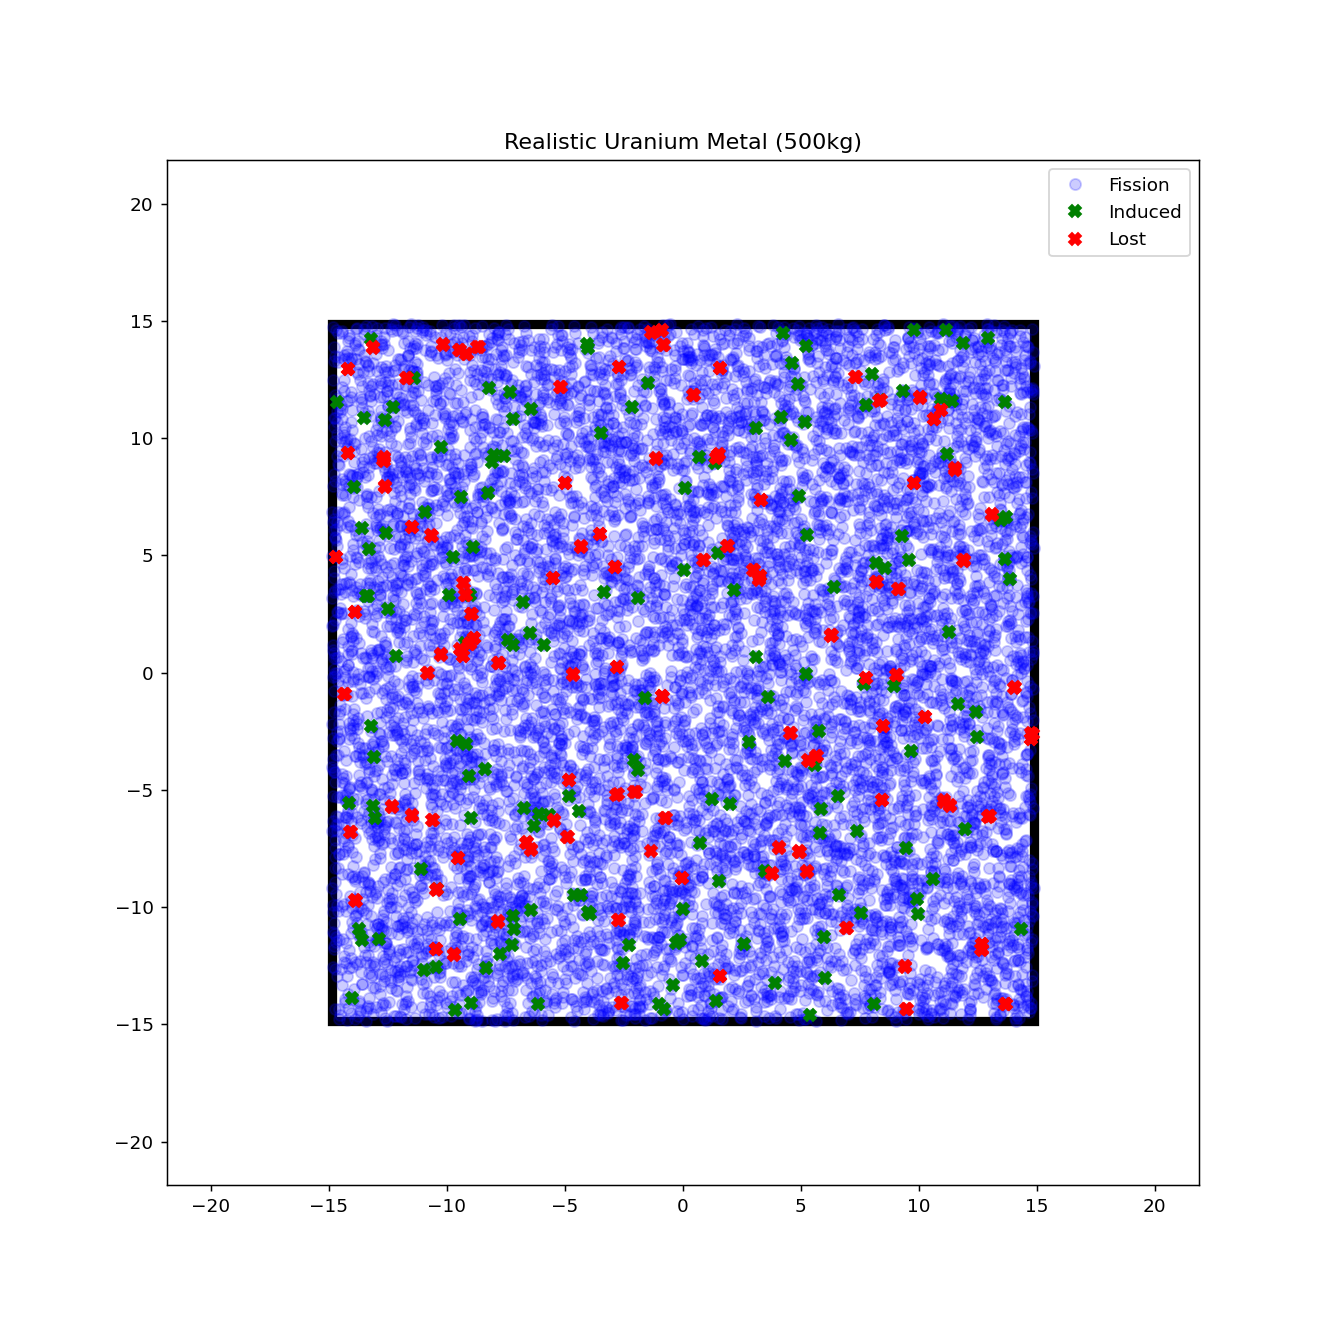

In [38]:
'''
Same as before. 
Animation is for a realistic Uranium metal now.
'''
%matplotlib notebook
chain=FissionChain(500000,10000,E=0.007,A=5.843e-22) #500kg, slow neutrons, natural Uranium-235 abundance
a,b,c=chain.mass_shape() 
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim([-(a/2)-7,(a/2)+7])
ax.set_ylim([-(b/2)-7,(b/2)+7])
ax.add_patch(Rectangle((-a/2,-b/2),a,b,edgecolor='Black',fill=False,lw=5))
ax.set_title(r'Realistic Uranium Metal (500kg)')
startsx=[]
startsy=[]
endsx=[]
endsy=[]
badx=[]
bady=[]

for _ in range(chain.N): 
            x0,y0,z0=chain.fission_loc(a,b,c) #generate fission location
            startsx.append(x0)
            startsy.append(y0)
            for _ in range(round(random.normal(2.45,0.07))): #two or three neutrons produced         
                x1,y1,z1=chain.neutron_travel(x0,y0,z0)
                if chain.check_inside(a,b,c,x1,y1,z1) and random.random()<=chain.E: #check inside, E-enrichment default 1                 
                    endsx.append(x1)
                    endsy.append(y1)
                else: 
                    badx.append(x1)
                    bady.append(y1)
starts,=ax.plot(startsx,startsy,'bo',label='Fission',alpha=0.2)
ends,=ax.plot(endsx,endsy,'gX',label='Induced')
bad,=ax.plot(badx,bady,'rX',label='Lost')
ax.legend()

def update(frame):
    x=[endsx[:frame+1]]
    y=[endsy[:frame+1]]
    x1=[badx[:frame]]
    y1=[bady[:frame]]
    ends.set_data(x,y)
    bad.set_data(x1,y1)
    #starts.set_data(x1,y1) #animate starting positions
    return (ends,),(bad,)

ani=FuncAnimation(fig,update,frames=1000,interval=80,repeat=True,blit=True)
plt.show() 
writergif=animation.PillowWriter(fps=30)
ani.save('filename16.gif',writer=writergif)

<IPython.core.display.Javascript object>


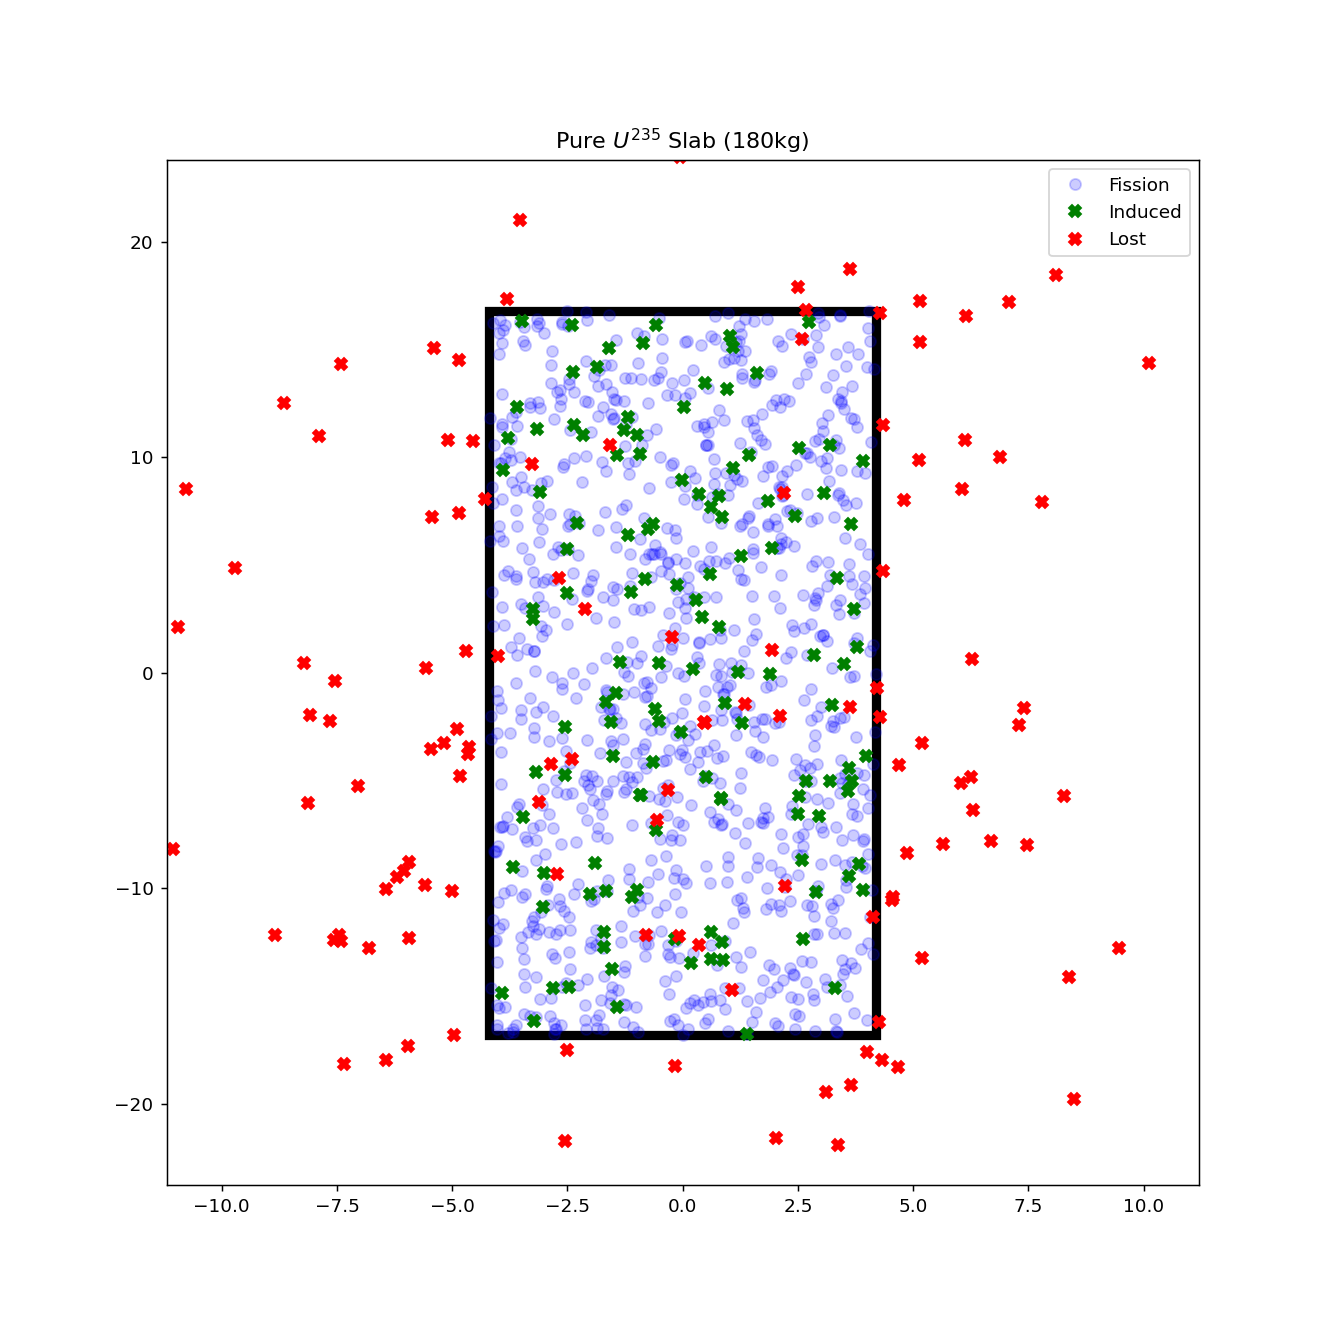

In [41]:
'''
Same as before. 
Animation is for a slab shape now.
'''
%matplotlib notebook
chain=FissionChain(180000,1000,S=0.25) #180kg, fast neutrons, pure Uranium-235, rectangular shape
a,b,c=chain.mass_shape() 
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim([-(a/2)-7,(a/2)+7])
ax.set_ylim([-(b/2)-7,(b/2)+7])
ax.add_patch(Rectangle((-a/2,-b/2),a,b,edgecolor='Black',fill=False,lw=5))
ax.set_title(r'Pure $U^{235}$ Slab (180kg)')
startsx=[]
startsy=[]
endsx=[]
endsy=[]
badx=[]
bady=[]

for _ in range(chain.N): 
            x0,y0,z0=chain.fission_loc(a,b,c) #generate fission location
            startsx.append(x0)
            startsy.append(y0)
            for _ in range(round(random.normal(2.45,0.07))): #two or three neutrons produced         
                x1,y1,z1=chain.neutron_travel(x0,y0,z0)
                if chain.check_inside(a,b,c,x1,y1,z1) and random.random()<=chain.E: #check inside, E-enrichment default 1                 
                    endsx.append(x1)
                    endsy.append(y1)
                else: 
                    badx.append(x1)
                    bady.append(y1)
starts,=ax.plot(startsx,startsy,'bo',label='Fission',alpha=0.2)
ends,=ax.plot(endsx,endsy,'gX',label='Induced')
bad,=ax.plot(badx,bady,'rX',label='Lost')
ax.legend()

def update(frame):
    x=[endsx[:frame+1]]
    y=[endsy[:frame+1]]
    x1=[badx[:frame]]
    y1=[bady[:frame]]
    ends.set_data(x,y)
    bad.set_data(x1,y1)
    #starts.set_data(x1,y1) #animate starting positions
    return (ends,),(bad,) 

ani=FuncAnimation(fig,update,frames=1000,interval=80,repeat=True,blit=True)
plt.show() 
writergif=animation.PillowWriter(fps=30)
ani.save('filename26.gif',writer=writergif)